<a href="https://colab.research.google.com/github/CadeHarger/portfolio/blob/main/Personal_Projects/Stock_Market_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
#@title Import Relevant Modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import time
import math
import random

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [ ]:
#@title Load the Dataset
file = open("AllStocks.csv")

def loadDataSet(dataSize):

  testPercent = 0.10

  # Create Array of all stock prices, average their daily highs and lows
  length = 0
  for line in file:
    length += 1
  dataset = np.zeros((length))
  file.seek(0)
  x = 0
  for line in file:
    comLoc = line.find(",")
    try:
      dataset[x] = (float(line[0:comLoc]) + float(line[comLoc + 1:])) / 2
    except:
      pass
      #print(line, x)
      #print(line[0:comLoc], line[comLoc + 1:])
    x += 1

  withLabels = math.ceil(len(dataset) / dataSize)
  featureSet = np.zeros((withLabels, dataSize - 1, 1), dtype=np.float32)
  labelSet = np.zeros((withLabels, 1), dtype=np.float32)

  # Format the dataset into examples
  for x in range(withLabels - 1):
    for y in range(dataSize - 1):
      featureSet[x][y][0] = dataset[x * (dataSize) + y]
    labelSet[x][0] = dataset[x * dataSize + dataSize]
  # Convert dataset to its Z-Scores
  for x in range(len(featureSet) - 1):
    mean = sum(featureSet[x].flatten()) / len(featureSet[x])
    standard = np.std(featureSet[x].flatten())
    for y in range(dataSize - 1):
      featureSet[x][y][0] = (featureSet[x][y][0] - mean) / standard
    labelSet[x][0] = (labelSet[x][0] - mean) / standard

  testSize = int(testPercent * len(featureSet))

  # Form the test sets
  testFeatureSet = featureSet[-1 * testSize:]
  testLabelSet = labelSet[-1 * testSize:]
  featureSet = featureSet[:-1 * testSize]
  labelSet = labelSet[:-1 * testSize]

  # Shuffle the data

  shuffler = np.random.permutation(len(featureSet))
  featureSet = featureSet[shuffler]
  labelSet = labelSet[shuffler]

  shuffler = np.random.permutation(len(testFeatureSet))
  testFeatureSet = testFeatureSet[shuffler]
  testLabelSet = testLabelSet[shuffler]

  print("Done")

dataSize = 10

testPercent = 0.10

# Create Array of all stock prices, average their daily highs and lows
length = 0
for line in file:
  length += 1
dataset = np.zeros((length))
file.seek(0)
x = 0
for line in file:
  comLoc = line.find(",")
  try:
    dataset[x] = (float(line[0:comLoc]) + float(line[comLoc + 1:])) / 2
  except:
    pass
    #print(line, x)
    #print(line[0:comLoc], line[comLoc + 1:])
  x += 1

withLabels = math.ceil(len(dataset) / dataSize)
featureSet = np.zeros((withLabels, dataSize - 1, 1), dtype=np.float32)
labelSet = np.zeros((withLabels, 1), dtype=np.float32)

# Format the dataset into examples
for x in range(withLabels - 1):
  for y in range(dataSize - 1):
    featureSet[x][y][0] = dataset[x * (dataSize) + y]
  labelSet[x][0] = dataset[x * dataSize + dataSize]
# Convert dataset to its Z-Scores
for x in range(len(featureSet) - 1):
  mean = sum(featureSet[x].flatten()) / len(featureSet[x])
  standard = np.std(featureSet[x].flatten())
  for y in range(dataSize - 1):
    featureSet[x][y][0] = (featureSet[x][y][0] - mean) / standard
  labelSet[x][0] = (labelSet[x][0] - mean) / standard

testSize = int(testPercent * len(featureSet))

# Form the test sets
testFeatureSet = featureSet[-1 * testSize:]
testLabelSet = labelSet[-1 * testSize:]
featureSet = featureSet[:-1 * testSize]
labelSet = labelSet[:-1 * testSize]

# Shuffle the data

shuffler = np.random.permutation(len(featureSet))
featureSet = featureSet[shuffler]
labelSet = labelSet[shuffler]

shuffler = np.random.permutation(len(testFeatureSet))
testFeatureSet = testFeatureSet[shuffler]
testLabelSet = testLabelSet[shuffler]

print("Done")

Done


In [ ]:
#@title Define the plotting function
'''
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")
'''

def plot_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()

print("Defined the plot_the_loss_curve function.")


Defined the plot_the_loss_curve function.


In [ ]:
#@title Model Creation
def createModel(lr):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Input(shape=(dataSize - 1, 1)))
  '''

  model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=4, strides=1, activation='relu', input_shape=(dataSize - 1,1)))

  model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=2, strides=1, activation='relu'))

  model.add(tf.keras.layers.Dropout(rate=0.2))

  model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(units=24, activation='relu', name='Hidden1'))
  '''
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(units=100, activation='relu', name='Hidden1'))

  #model.add(tf.keras.layers.Dense(units=16, activation='relu', name='Hidden2'))

  model.add(tf.keras.layers.Dense(units=1, name='Output'))

  model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])


  return model

In [ ]:
#@title Model Training
def trainModel(model, features, label, epochs,
                batchSize=None, validationSplit=0.1):

  # Split the dataset into features and label.
  #features = {name:np.array(value) for name, value in dataset.items()}
  #label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batchSize,
                      epochs=epochs, shuffle=True, validation_split=validationSplit)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               1000      
_________________________________________________________________
Output (Dense)               (None, 1)                 101       
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
126/126 [==============================] - 4s 5ms/step - loss: 6.8158 - mean_squared_error: 6.8158 - val_loss: 4.2935 - val_mean_squared_error: 4.2935
Epoch 2/10
126/126 [==============================] - 0s 3ms/step - loss: 6.8565 - mean_squared_error: 6.8565 - val_loss: 4.2493 - val_mean_squared_error: 4.2493
Epoch 3/10
126/126 [==============================] - 0s 2ms

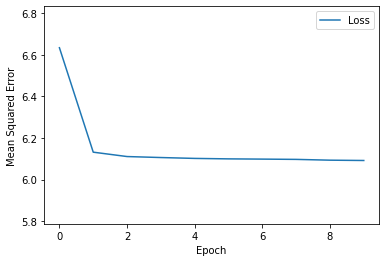

Evaluate Model on Test Set:
16/16 [==============================] - 0s 2ms/step - loss: 4.4136 - mean_squared_error: 4.4136


[4.4136223793029785, 4.4136223793029785]

In [ ]:
#@title The AI

lr = 0.001
epochs = 10
batchSize = 400
validationSplit = 0.1

model = createModel(lr)
model.summary()

epochs, hist = trainModel(model, featureSet, labelSet, epochs, batchSize, validationSplit)
metrics = ['accuracy', 'val_accuracy']
plot_curve(epochs, hist)

print("Evaluate Model on Test Set:")
model.evaluate(x = testFeatureSet, y = testLabelSet, batch_size=batchSize)

In [ ]:
#@title Optimize Data Size
histogram = []
index = 0
lr = 0.001
epochs = 8
batchSize = 300
validationSplit = 0.1
while True:
  print("x: ", x)
  stats = []
  min = 9999
  for x in range(4, 30):
    loadDataSet(x)
    model = createModel(lr)
    trainModel(model, featureSet, labelSet, epochs, batchSize, validationSplit)
    stats.append(model.evaluate(x = testFeatureSet, y = testLabelSet, batch_size=batchSize))
    print(stats[x - 4])
    if stats[x - 4][1] < min:
      min = stats[x - 4][1]
      index = x
  histogram.append(index)

print("Minimum MSE: ", min)
print("Data Size: ", index)
print()
print(stats)


x:  61902
Done
Epoch 1/8
168/168 [==============================] - 1s 3ms/step - loss: 6.2702 - mean_squared_error: 6.2702 - val_loss: 5.0990 - val_mean_squared_error: 5.0990
Epoch 2/8
168/168 [==============================] - 0s 2ms/step - loss: 5.8297 - mean_squared_error: 5.8297 - val_loss: 5.1113 - val_mean_squared_error: 5.1113
Epoch 3/8
168/168 [==============================] - 0s 2ms/step - loss: 6.2288 - mean_squared_error: 6.2288 - val_loss: 5.1206 - val_mean_squared_error: 5.1206
Epoch 4/8
168/168 [==============================] - 0s 2ms/step - loss: 6.3991 - mean_squared_error: 6.3991 - val_loss: 5.1087 - val_mean_squared_error: 5.1087
Epoch 5/8
168/168 [==============================] - 0s 2ms/step - loss: 4.9573 - mean_squared_error: 4.9573 - val_loss: 5.1037 - val_mean_squared_error: 5.1037
Epoch 6/8
168/168 [==============================] - 0s 2ms/step - loss: 6.1450 - mean_squared_error: 6.1450 - val_loss: 5.1141 - val_mean_squared_error: 5.1141
Epoch 7/8
 31/168 [

KeyboardInterrupt: ignored

In [ ]:
#@title Show Optimized Histogram
print(histogram)

for x in range(4, 30):
  print(x, ": ", end="")
  count = 0
  for y in histogram:
    if y == x:
      count += 1
  print(count)


NameError: ignored

In [ ]:
#@title Get random S&P 500 tickers
tickers = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
		'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
		'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
		'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
		'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
		'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
		'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
		'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
		'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
		'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
		'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
		'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
		'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
		'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
		'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
		'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
		'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
		'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
		'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
		'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
		'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
		'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
		'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
		'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
		'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
		'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
		'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
		'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
		'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
		'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
		'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
		'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
		'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
		'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
		'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
		'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
		'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
		'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
		'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']
print(random.sample(tickers, 5))

['HPQ', 'MCO', 'IP', 'KSS', 'FITB']


38.38	37.17 38.34	37.42 38.03	37.19 38.85	37.92	38.43	37.86 38.71	38.15 38.23	37.38	38.60	38.12	38.91	38.40

In [ ]:
#@title Real-World Interaction

print("Enter Stock Data ( High(space)Low(space)DayX ): ")
inputData = input().split()

#filter out commas
for x in range(len(inputData)):
  inputData[x] = inputData[x].replace(",", "")

if len(inputData) % 2 == 1:
    print("Input data must be even (High/Low daily pairs)")

averaged = []
for x in range(0, len(inputData), 2):
  averaged.append((float(inputData[x]) + float(inputData[x + 1])) / 2.0)

mean = sum(averaged) / len(averaged)
standard = np.std(averaged)
for x in range(len(averaged)):
  averaged[x] = [(averaged[x] - mean) / standard]
#1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9

expected = model.predict(np.array([averaged]))[0][0]
print()
print("Expected average of daily high and low:   $", (expected * standard) + mean)

Enter Stock Data ( High(space)Low(space)DayX ): 
38.38	37.17 38.34	37.42 38.03	37.19 38.85	37.92	38.43	37.86 38.71	38.15 38.23	37.38	38.60	38.12	38.91	38.40	

Expected average of daily high and low:   $ 38.71109516894265
